In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport mapster
from os import listdir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
watertown = mapster.yelp_read('./yelp_pickles/watertownbig/')
scores = mapster.score_read('./score_pickles/','waterscore.pkl')

In [16]:
ls ./score_pickles/

waterscore.pkl*  waterscore2.pkl*


In [21]:
print scores.head

<bound method DataFrame.head of          1267575.0:2642650.0  1267575.0:2642675.0  1267575.0:2642700.0  \
mexican           115.879630           122.229167           123.016204   
pizza              93.746599           111.048895            99.220569   
sushi             103.682398           441.377976           472.488520   
thai              131.156463           126.395408           129.143707   

         1267575.0:2642725.0  1267575.0:2642750.0  1267575.0:2642775.0  \
mexican           138.016204           164.152778           161.217593   
pizza              94.285751            84.739712            91.586934   
sushi             115.020833            94.854167            87.541667   
thai              121.320956           119.837585           158.209609   

         1267575.0:2642800.0  1267575.0:2642825.0  1267575.0:2642850.0  \
mexican           146.703373           148.590183           105.338614   
pizza              82.698045            73.537551            62.782150   
sush

In [28]:
keys = watertown.keys()
print keys[-10:]
print watertown[keys[0]].keys()

['1267900.0_2643575.0', '1268225.0_2643150.0', '1268150.0_2642950.0', '1268150.0_2642775.0', '1268100.0_2643125.0', '1267750.0_2643375.0', '1268050.0_2643075.0', '1268025.0_2642650.0', '1268100.0_2642900.0', '1267650.0_2643150.0']
Index([u'thai', u'sushi', u'mexican', u'pizza'], dtype='object')


In [24]:
mapster.update_score(watertown,scores)

ValueError: invalid literal for float(): 1268375.0_2643225.0

# fixing 1 time error with watertown data set

For some reason I switched the : with a _ in the encoding of the pixels in the watertown data set.  I just gotta do a one time switcheroo.


In [29]:
wtfixed = {}
for key in watertown.keys():
    newkey = key.replace("_",":")
    wtfixed[newkey] = watertown[key]

In [37]:
keys = wtfixed.keys()
print wtfixed[keys[100]]['pizza']

   error error-message                                id       lat       lng  \
0  False          None              pizza-roma-watertown  42.37714 -71.18838   
1  False          None  d-and-d-pizza-and-subs-watertown  42.36788 -71.17862   
2  False          None               max-and-leos-newton    42.357 -71.18684   

               name oauth2-ascii-error rating  
0        Pizza Roma              False    4.5  
1  D&D Pizza & Subs              False    4.5  
2     Max and Leo's              False    4.5  


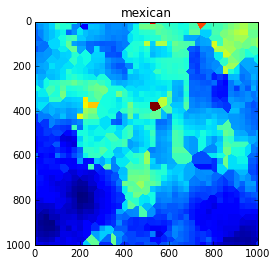

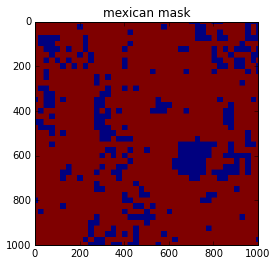

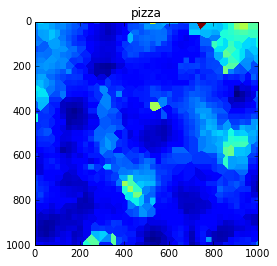

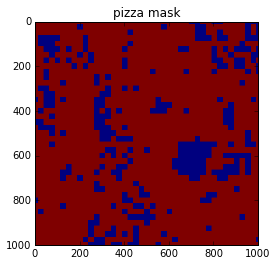

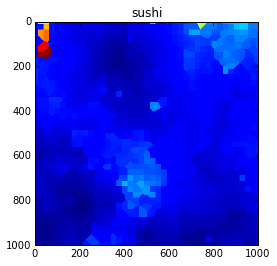

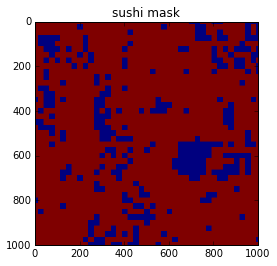

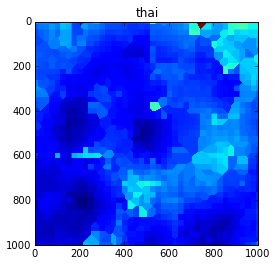

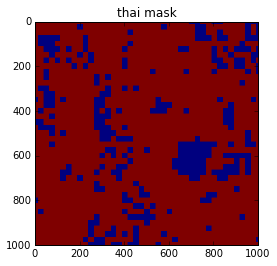

In [38]:
xpos, ypos, interp = mapster.interpolate_yelp_score(scores,plot=True)

In [39]:
print xpos

{'thai': array([[ 1267575.,  1267575.,  1267575., ...,  1267575.,  1267575.,
         1267575.],
       [ 1267576.,  1267576.,  1267576., ...,  1267576.,  1267576.,
         1267576.],
       [ 1267577.,  1267577.,  1267577., ...,  1267577.,  1267577.,
         1267577.],
       ..., 
       [ 1268572.,  1268572.,  1268572., ...,  1268572.,  1268572.,
         1268572.],
       [ 1268573.,  1268573.,  1268573., ...,  1268573.,  1268573.,
         1268573.],
       [ 1268574.,  1268574.,  1268574., ...,  1268574.,  1268574.,
         1268574.]]), 'sushi': array([[ 1267575.,  1267575.,  1267575., ...,  1267575.,  1267575.,
         1267575.],
       [ 1267576.,  1267576.,  1267576., ...,  1267576.,  1267576.,
         1267576.],
       [ 1267577.,  1267577.,  1267577., ...,  1267577.,  1267577.,
         1267577.],
       ..., 
       [ 1268572.,  1268572.,  1268572., ...,  1268572.,  1268572.,
         1268572.],
       [ 1268573.,  1268573.,  1268573., ...,  1268573.,  1268573.,
      

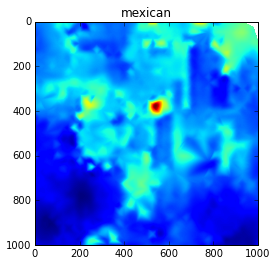

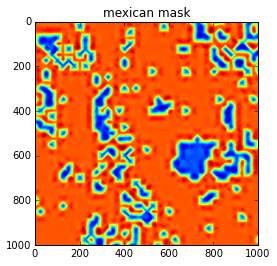

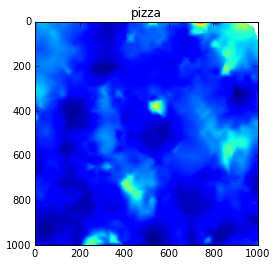

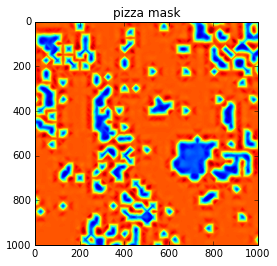

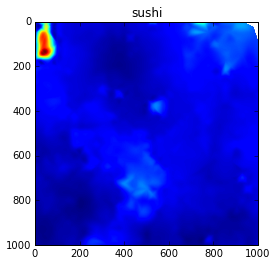

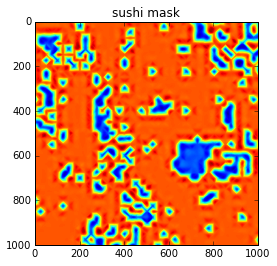

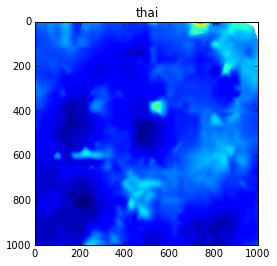

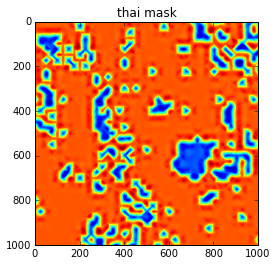

In [43]:
xpos, ypos, interp_bilin = mapster.interpolate_yelp_score(scores,plot=True,method='cubic')

In [51]:
import numpy as np
print np.matrix(xpos)
print len(xpos)
print len(xpos[0])
print ypos.max()
print ypos.min()


[[ 1267575.  1267575.  1267575. ...,  1267575.  1267575.  1267575.]
 [ 1267576.  1267576.  1267576. ...,  1267576.  1267576.  1267576.]
 [ 1267577.  1267577.  1267577. ...,  1267577.  1267577.  1267577.]
 ..., 
 [ 1268572.  1268572.  1268572. ...,  1268572.  1268572.  1268572.]
 [ 1268573.  1268573.  1268573. ...,  1268573.  1268573.  1268573.]
 [ 1268574.  1268574.  1268574. ...,  1268574.  1268574.  1268574.]]
1000
1000
2643649.0
2642650.0
